[*********************100%%**********************]  1 of 1 completed


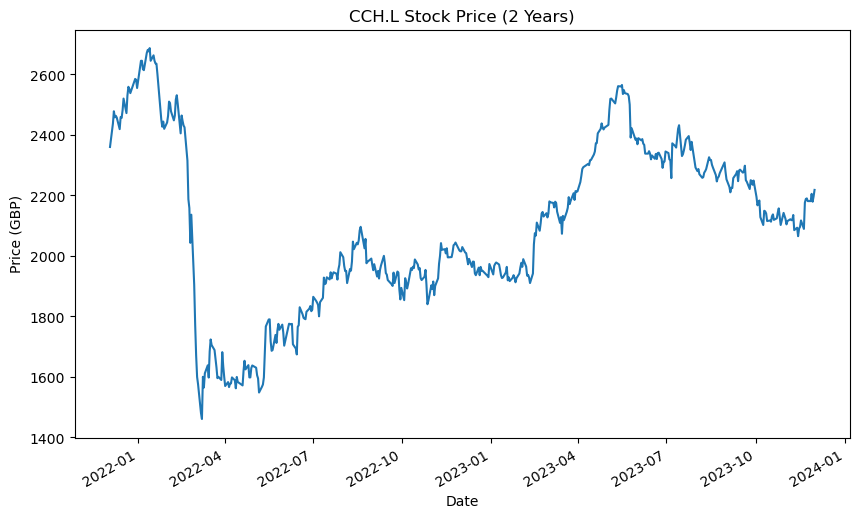

Descriptive Statistics for Coca Cola HBC AG Stock (CCH.L):
count     502.000000
mean     2095.337649
std       276.401370
min      1460.500000
25%      1926.500000
50%      2094.500000
75%      2315.750000
max      2687.000000
Name: Close, dtype: float64
Annualized Average Return: 0.75%
Annualized Standard Deviation: 27.80%


In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.stats import norm
import math

# Set the ticker and time period
ticker = 'CCH.L'
end_date = datetime.today()
start_date = end_date - timedelta(days=2*365)  # Two years from today

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Plot the closing prices
data['Close'].plot(title=f'{ticker} Stock Price (2 Years)', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Price (GBP)')
plt.show()

# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Calculate annualized average return
avg_daily_return = data['Daily Return'].mean()
annualized_avg_return = (1 + avg_daily_return) ** 252 - 1  # 252 trading days in a year

# Calculate annualized standard deviation
annualized_std_dev = data['Daily Return'].std() * np.sqrt(252)

# 'Close' prices
close_prices = data['Close']

# Calculate descriptive statistics
stats = close_prices.describe()

# Print the statistics
print("Descriptive Statistics for Coca Cola HBC AG Stock (CCH.L):")
print(stats)


print(f"Annualized Average Return: {annualized_avg_return * 100:.2f}%")
print(f"Annualized Standard Deviation: {annualized_std_dev * 100:.2f}%")


[*********************100%%**********************]  1 of 1 completed
Log Returns for Coca Cola HBC AG (CCH.L):
Date
2021-12-02   -0.000420
2021-12-03   -0.008859
2021-12-06    0.032106
2021-12-07    0.016684
2021-12-08   -0.008104
                ...   
2023-11-27    0.000000
2023-11-28    0.010944
2023-11-29   -0.011861
2023-11-30    0.007771
2023-12-01    0.009968
Name: Close, Length: 503, dtype: float64
Mean Log Return for Coca Cola HBC AG (CCH.L):
-0.00014181825448297136
[*********************100%%**********************]  1 of 1 completed
Annualized Average Return: 3.82%
Annualized Standard Deviation: 14.32%


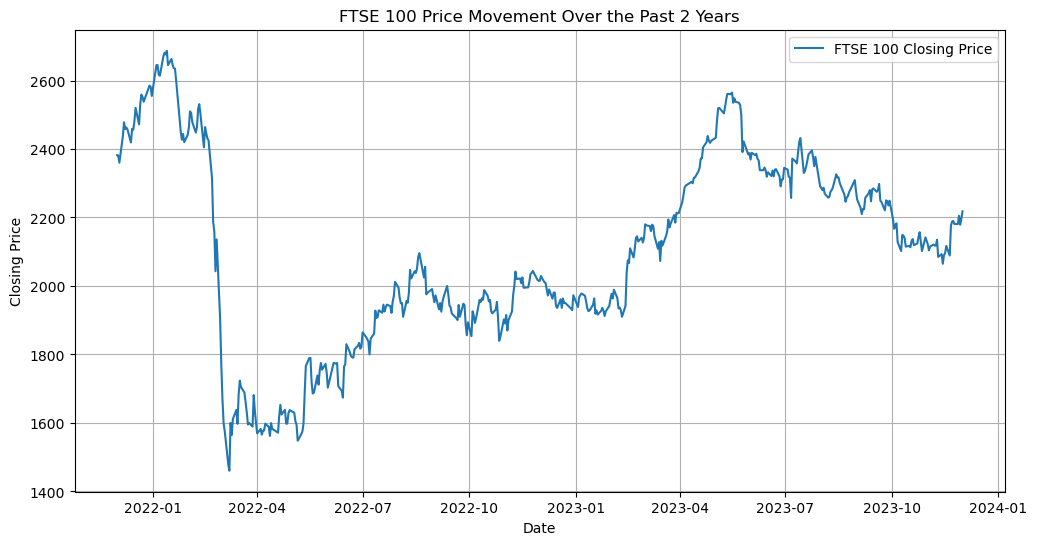

In [33]:


# Fetch historical data for Coca Cola HBC AG
ticker = 'CCH.L'
data = yf.download(ticker, period='2y')

# Focus on the 'Close' prices
close_prices = data['Close']

# Calculate log returns
log_returns = np.log(close_prices / close_prices.shift(1))

# Drop the NaN values created by the shift operation
log_returns = log_returns.dropna()

# Display the log returns
print("Log Returns for Coca Cola HBC AG (CCH.L):")
print(log_returns)

# Calculate the mean of log returns
mean_log_return = log_returns.mean()

# Print the mean log return
print("Mean Log Return for Coca Cola HBC AG (CCH.L):")
print(mean_log_return)

# Get daily returns
daily_returns = get_data_and_returns(ticker_symbol, start_date, end_date)

# Calculate annualized average return
annualized_avg_return = daily_returns.mean() * 252
print(f"Annualized Average Return: {annualized_avg_return * 100:.2f}%")


# Calculate annualized standard deviation
annualized_std_dev = daily_returns.std() * np.sqrt(252)
print(f"Annualized Standard Deviation: {annualized_std_dev * 100:.2f}%")

# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='FTSE 100 Closing Price')
plt.title("FTSE 100 Price Movement Over the Past 2 Years")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()



[*********************100%%**********************]  1 of 1 completed
Mean Log Return for the past 2 years: 0.00011094743482488304


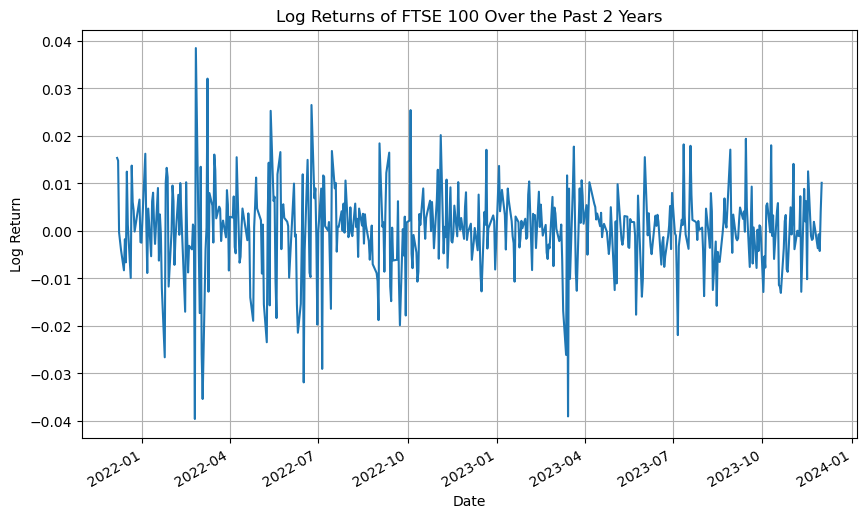

In [34]:


# Function to download data and calculate log returns
def get_log_returns(ticker, start_date, end_date):
    # Download historical data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate log returns
    log_returns = np.log(data['Close'] / data['Close'].shift(1))
    return log_returns

# Define the ticker symbol for FTSE 100
ticker_symbol = "^FTSE"

# Define the time period (last 2 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

# Get log returns
log_returns = get_log_returns(ticker_symbol, start_date, end_date)

# Calculate mean log return
mean_log_return = log_returns.mean()
print("Mean Log Return for the past 2 years:", mean_log_return)

# Plotting the log returns
plt.figure(figsize=(10, 6))
log_returns.plot()
plt.title("Log Returns of FTSE 100 Over the Past 2 Years")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.show()


In [24]:
import numpy as np
import scipy.stats as si
import yfinance as yf

def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes option price.

    :param S: Current stock price
    :param K: Strike price
    :param T: Time to expiration in years
    :param r: Risk-free interest rate
    :param sigma: Volatility of the stock
    :param option_type: 'call' or 'put'
    :return: Option price
    """
    # Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate option price
    if option_type == 'call':
        option_price = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    elif option_type == 'put':
        option_price = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

# Example usage
ticker = 'CCH.L'
data = yf.download(ticker, period="1d")
current_stock_price = data['Close'][-1]  # Latest closing price

# Inputs for the Black-Scholes model
strike_price = 2200  # strike price
time_to_expiration = 0.25  # 3 months until expiration
risk_free_rate = 0.0417  # risk-free rate (4.17%) UK Gilt 10 Year Yield
volatility = 0.278  # volatility (27.8%)

# Calculate option price
call_option_price = black_scholes(current_stock_price, strike_price, time_to_expiration, risk_free_rate, volatility, 'call')
put_option_price = black_scholes(current_stock_price, strike_price, time_to_expiration, risk_free_rate, volatility, 'put')

print(f"Call Option Price: {call_option_price}")
print(f"Put Option Price: {put_option_price}")


[*********************100%%**********************]  1 of 1 completed
Call Option Price: 143.25657672837747
Put Option Price: 102.44071106465378


[*********************100%%**********************]  1 of 1 completed


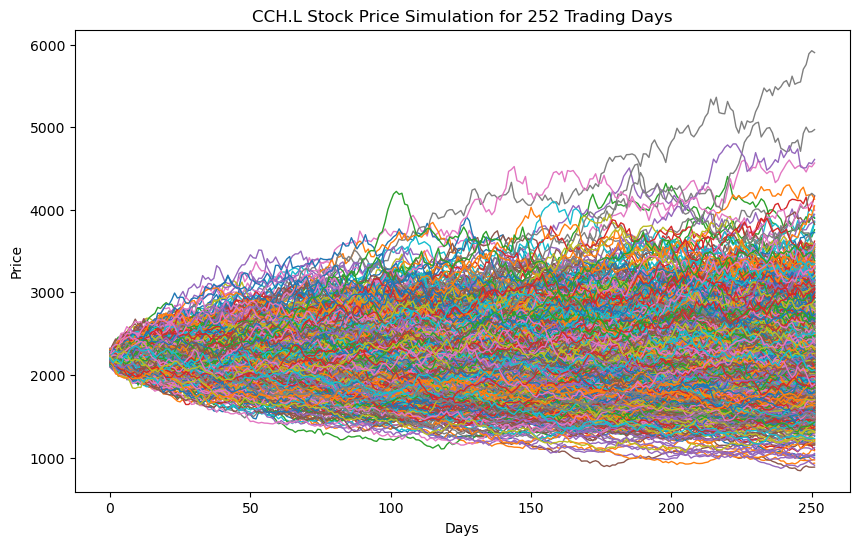

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download historical data for Coca Cola HBC AG
ticker = 'CCH.L'
data = yf.download(ticker, period='2y')

# Calculate the daily returns
daily_returns = data['Close'].pct_change().dropna()

# Get the mean and standard deviation of daily returns
mean_daily_return = daily_returns.mean()
std_dev_daily_return = daily_returns.std()

# Set up the Monte Carlo parameters
num_simulations = 1000
num_days = 252  # Number of trading days in the future

# Create an empty matrix to hold the simulation results
simulation_results = np.zeros((num_simulations, num_days))

# Run the simulations
for sim in range(num_simulations):
    # Start with the last closing price
    future_price = data['Close'][-1]
    for day in range(num_days):
        # Simulate the price change
        simulated_return = np.random.normal(mean_daily_return, std_dev_daily_return)
        future_price *= (1 + simulated_return)
        simulation_results[sim, day] = future_price

# Plot the simulations
plt.figure(figsize=(10,6))
plt.plot(simulation_results.T, linewidth=1)
plt.title(f'{ticker} Stock Price Simulation for {num_days} Trading Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


In [1]:
import numpy as np
import scipy.stats as si
import yfinance as yf

def black_scholes_greeks(S, K, T, r, sigma, option_type='call'):
    """
    Calculate Black-Scholes Greeks: Delta, Gamma, Theta, Vega.

    :param S: Current stock price
    :param K: Strike price
    :param T: Time to expiration in years
    :param r: Risk-free interest rate
    :param sigma: Volatility of the stock
    :param option_type: 'call' or 'put'
    :return: A dictionary containing the Greeks
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        delta = si.norm.cdf(d1)
        theta = -(S * si.norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2)
    elif option_type == 'put':
        delta = -si.norm.cdf(-d1)
        theta = -(S * si.norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    gamma = si.norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * si.norm.pdf(d1) * np.sqrt(T)

    return {
        'delta': delta,
        'gamma': gamma,
        'theta': theta / 365,  # Annualize theta
        'vega': vega / 100  # Adjust vega
    }

# Example usage
ticker = 'CCH.L'
data = yf.download(ticker, period="1d")
current_stock_price = data['Close'][-1]  # Latest closing price

# Inputs for the Black-Scholes model
strike_price = 2200  # Example strike price
time_to_expiration = 0.25  # 3 months until expiration
risk_free_rate = 0.0417  # risk-free rate (1%) UK Gilt 10 Year Yield
volatility = 0.278  # volatility (27.8%)

# Calculate Greeks
greeks = black_scholes_greeks(current_stock_price, strike_price, time_to_expiration, risk_free_rate, volatility, 'call')

print("Greeks for the Call Option:")
print(f"Delta: {greeks['delta']}")
print(f"Gamma: {greeks['gamma']}")
print(f"Theta: {greeks['theta']}")
print(f"Vega: {greeks['vega']}")


[*********************100%%**********************]  1 of 1 completed
Greeks for the Call Option:
Delta: 0.32692353460267093
Gamma: 0.0008133053563566191
Theta: -0.23675649343161007
Vega: 8.00215043984988


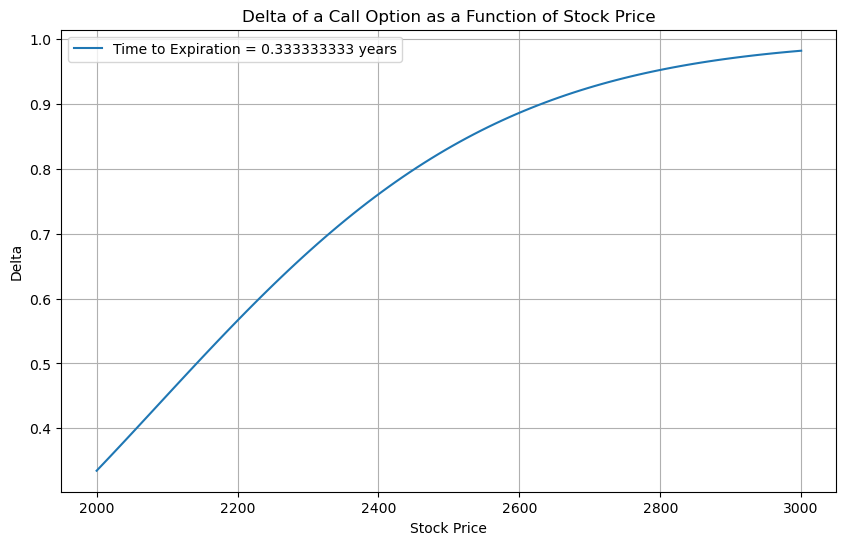

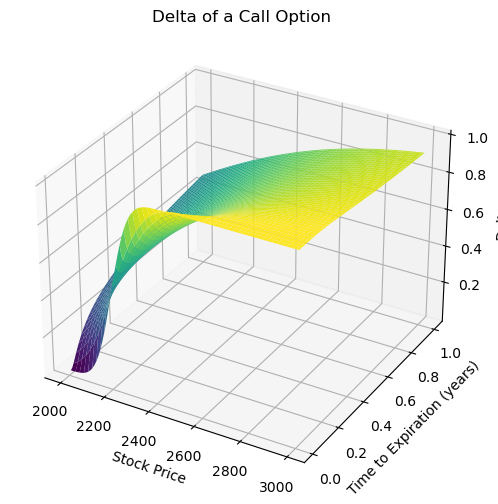

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as si

# Black-Scholes Delta
def black_scholes_delta(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        delta = si.norm.cdf(d1)
    elif option_type == 'put':
        delta = -si.norm.cdf(-d1)
    return delta

# Parameters
K = 2200  # strike price
r = 0.0417  # risk-free rate
sigma = 0.278  # volatility

S = np.linspace(2000, 3000, 100)  # range of stock prices
T = np.linspace(0.01, 1, 100)  # time to expiration in years

# 2D Plot for a fixed time to expiration
T_fixed = 0.25  # fixed time to expiration
delta_2d = black_scholes_delta(S, K, T_fixed, r, sigma, 'call')
plt.figure(figsize=(10, 6))
plt.plot(S, delta_2d, label=f'Time to Expiration = {T_fixed} years')
plt.title('Delta of a Call Option as a Function of Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)
plt.show()

# 3D Plot for varying stock price and time to expiration
S_mesh, T_mesh = np.meshgrid(S, T)
delta_3d = black_scholes_delta(S_mesh, K, T_mesh, r, sigma, 'call')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_mesh, T_mesh, delta_3d, cmap='viridis')
ax.set_title('Delta of a Call Option')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration (years)')
ax.set_zlabel('Delta')
plt.show()



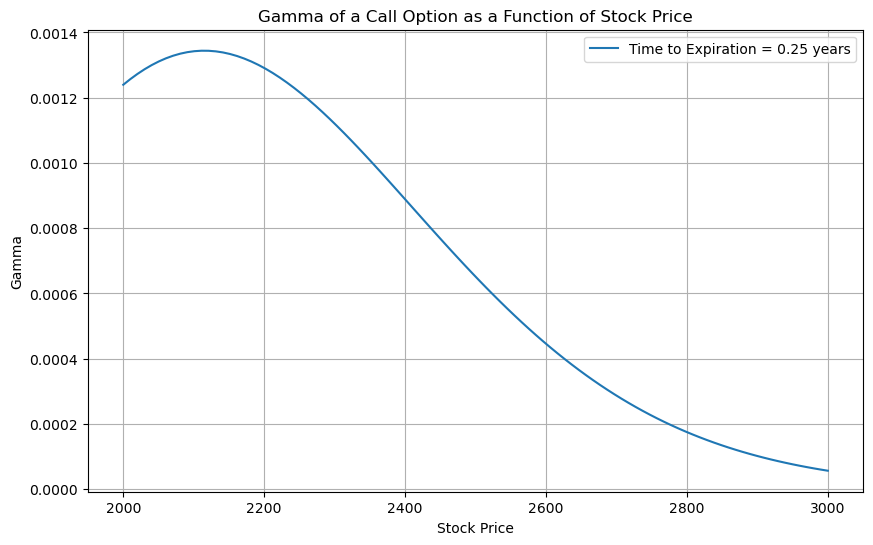

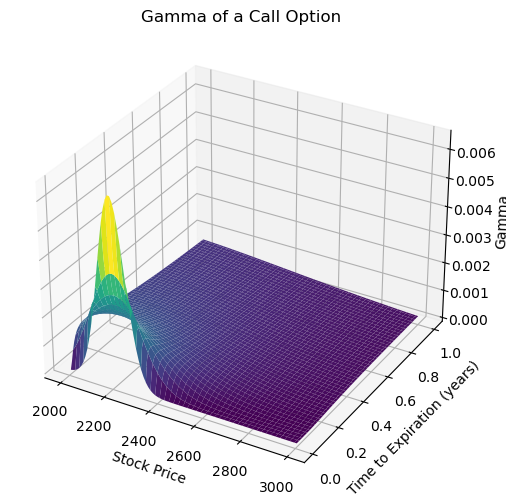

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as si

# Black-Scholes Gamma
def black_scholes_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = si.norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

# Parameters
K = 2200  # strike price
r = 0.0417  # risk-free rate
sigma = 0.278  # volatility
S = np.linspace(2000, 3000, 100)  # range of stock prices
T = np.linspace(0.01, 1, 100)  # time to expiration in years

# 2D Plot for a fixed time to expiration
T_fixed = 0.25  # fixed time to expiration
gamma_2d = black_scholes_gamma(S, K, T_fixed, r, sigma)
plt.figure(figsize=(10, 6))
plt.plot(S, gamma_2d, label=f'Time to Expiration = {T_fixed} years')
plt.title('Gamma of a Call Option as a Function of Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.legend()
plt.grid(True)
plt.show()

# 3D Plot for varying stock price and time to expiration
S_mesh, T_mesh = np.meshgrid(S, T)
gamma_3d = black_scholes_gamma(S_mesh, K, T_mesh, r, sigma)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_mesh, T_mesh, gamma_3d, cmap='viridis')
ax.set_title('Gamma of a Call Option')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration (years)')
ax.set_zlabel('Gamma')
plt.show()


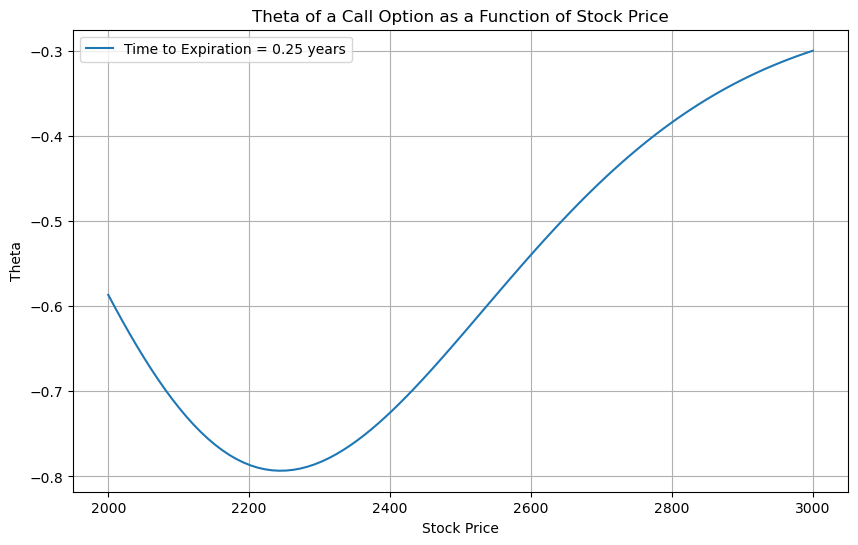

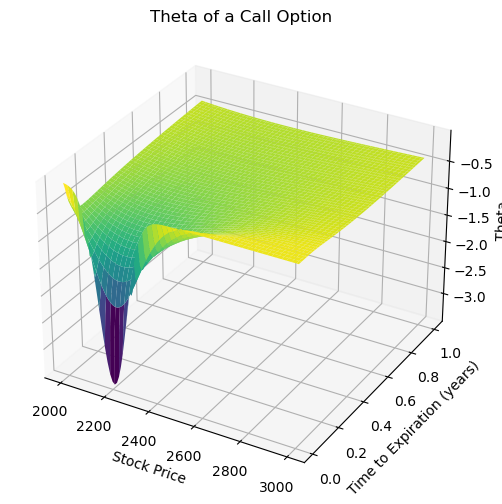

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as si

# Black-Scholes Theta
def black_scholes_theta(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        theta = -(S * si.norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2)
    elif option_type == 'put':
        theta = -(S * si.norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return theta / 365  # Annualize theta

# Parameters
K = 2200  # strike price
r = 0.0417  # risk-free rate
sigma = 0.278  # volatility
S = np.linspace(2000, 3000, 100)  # range of stock prices
T = np.linspace(0.01, 1, 100)  # time to expiration in years

# 2D Plot for a fixed time to expiration
T_fixed = 0.25  # fixed time to expiration
theta_2d = black_scholes_theta(S, K, T_fixed, r, sigma, 'call')
plt.figure(figsize=(10, 6))
plt.plot(S, theta_2d, label=f'Time to Expiration = {T_fixed} years')
plt.title('Theta of a Call Option as a Function of Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Theta')
plt.legend()
plt.grid(True)
plt.show()

# 3D Plot for varying stock price and time to expiration
S_mesh, T_mesh = np.meshgrid(S, T)
theta_3d = black_scholes_theta(S_mesh, K, T_mesh, r, sigma, 'call')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_mesh, T_mesh, theta_3d, cmap='viridis')
ax.set_title('Theta of a Call Option')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration (years)')
ax.set_zlabel('Theta')
plt.show()


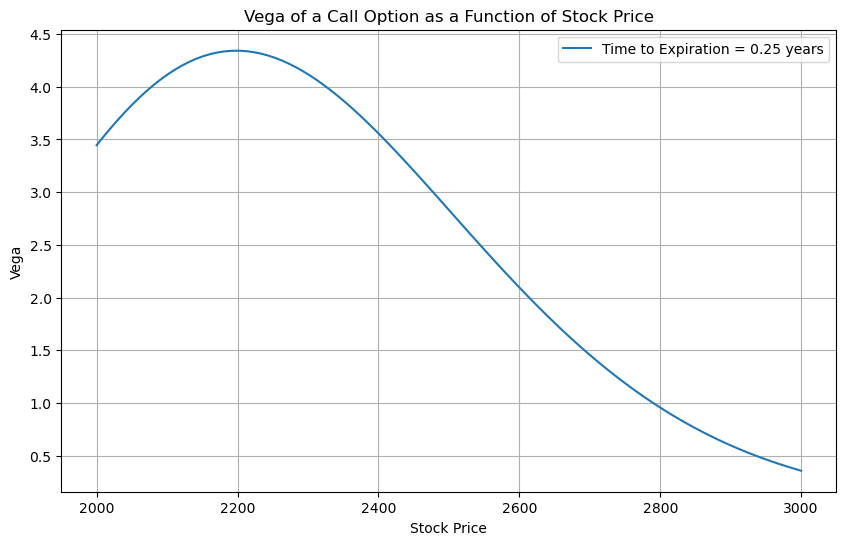

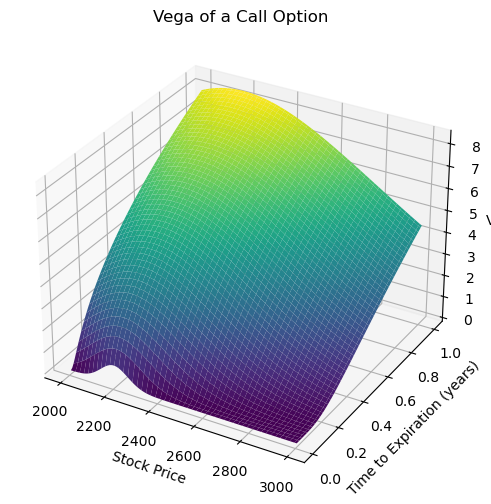

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as si

# Black-Scholes Vega
def black_scholes_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    vega = S * si.norm.pdf(d1) * np.sqrt(T)
    return vega / 100  # Adjust vega

# Parameters
K = 2200  # strike price
r = 0.0417  # risk-free rate
sigma = 0.278  # volatility
S = np.linspace(2000, 3000, 100)  # range of stock prices
T = np.linspace(0.01, 1, 100)  # time to expiration in years

# 2D Plot for a fixed time to expiration
T_fixed = 0.25  # fixed time to expiration
vega_2d = black_scholes_vega(S, K, T_fixed, r, sigma)
plt.figure(figsize=(10, 6))
plt.plot(S, vega_2d, label=f'Time to Expiration = {T_fixed} years')
plt.title('Vega of a Call Option as a Function of Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Vega')
plt.legend()
plt.grid(True)
plt.show()

# 3D Plot for varying stock price and time to expiration
S_mesh, T_mesh = np.meshgrid(S, T)
vega_3d = black_scholes_vega(S_mesh, K, T_mesh, r, sigma)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_mesh, T_mesh, vega_3d, cmap='viridis')
ax.set_title('Vega of a Call Option')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration (years)')
ax.set_zlabel('Vega')
plt.show()
